<a href="https://colab.research.google.com/github/gaurav-163/gaurav-163.github.io/blob/main/Prac_4_GMM_AAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

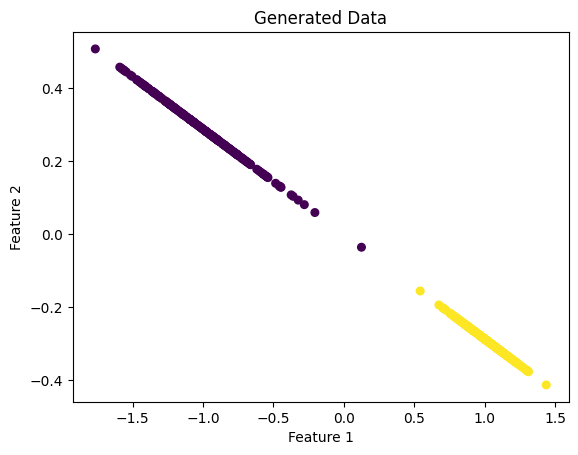

Accuracy of GMM-based Outcome Prediction: 99.80%


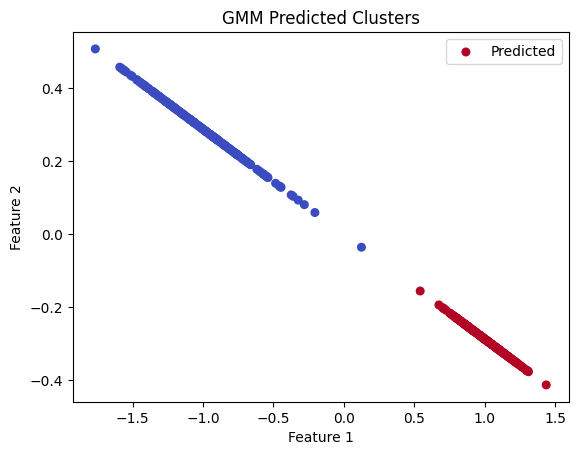

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
np.random.seed(42)
# Set n_informative and n_redundant such that their sum is less than or equal to n_features
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1,
                            n_informative=1, n_redundant=1, n_repeated=0, random_state=42)

# Step 2: Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3: Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Step 4: Predict clusters and outcomes
predicted_clusters = gmm.predict(X)

# Step 5: Map clusters to outcomes (optional: based on majority voting)
mapping = {0: 1 if np.sum(y[predicted_clusters == 0]) > np.sum(y[predicted_clusters == 1]) else 0,
           1: 0 if np.sum(y[predicted_clusters == 0]) > np.sum(y[predicted_clusters == 1]) else 1}
predicted_outcomes = np.array([mapping[cluster] for cluster in predicted_clusters])

# Step 6: Evaluate the model
accuracy = accuracy_score(y, predicted_outcomes)
print(f"Accuracy of GMM-based Outcome Prediction: {accuracy * 100:.2f}%")

# Step 7: Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_outcomes, cmap='coolwarm', s=30, label="Predicted")
plt.title("GMM Predicted Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()